<a href="https://colab.research.google.com/github/jaamike/project/blob/main/house-prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting the Sale Price of House using Machine Learning

## 1. Problem Difinition
>  Predict  sale price

## 2. Data
[dataset from Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) 

There are 3 datasets:

1. **train.csv** - the training set
2. **test.csv** - the test set
3. **sample_submission.csv** - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## 3. Evaluation
> Since the dataset is a time series we will use Regression Techniques

## 4. Feature
Kaggle provide a data decription which contains information about what each attribute of the dataset. 

### Importing the data and preparing it for modelling

In [45]:
# Importing data analysis tools
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [46]:
#Import train and test dataset
train = pd.read_csv("/content/drive/MyDrive/Project/house price/data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Project/house price/data/test.csv")
train_tmp = train.copy()
test_tmp = test.copy()

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
train_tmp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
test_tmp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Correlation matrix 

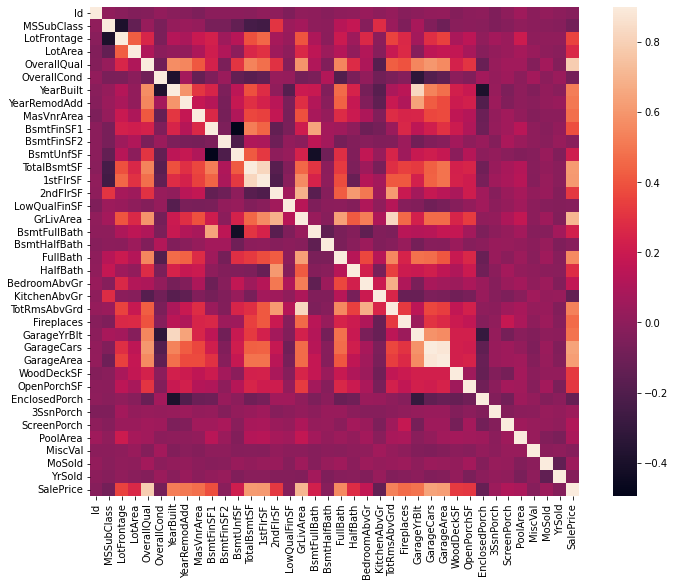

In [50]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True);

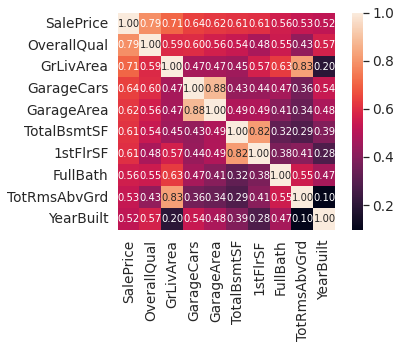

In [51]:
#sale price correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                            yticklabels=cols.values, xticklabels=cols.values)
plt.show()

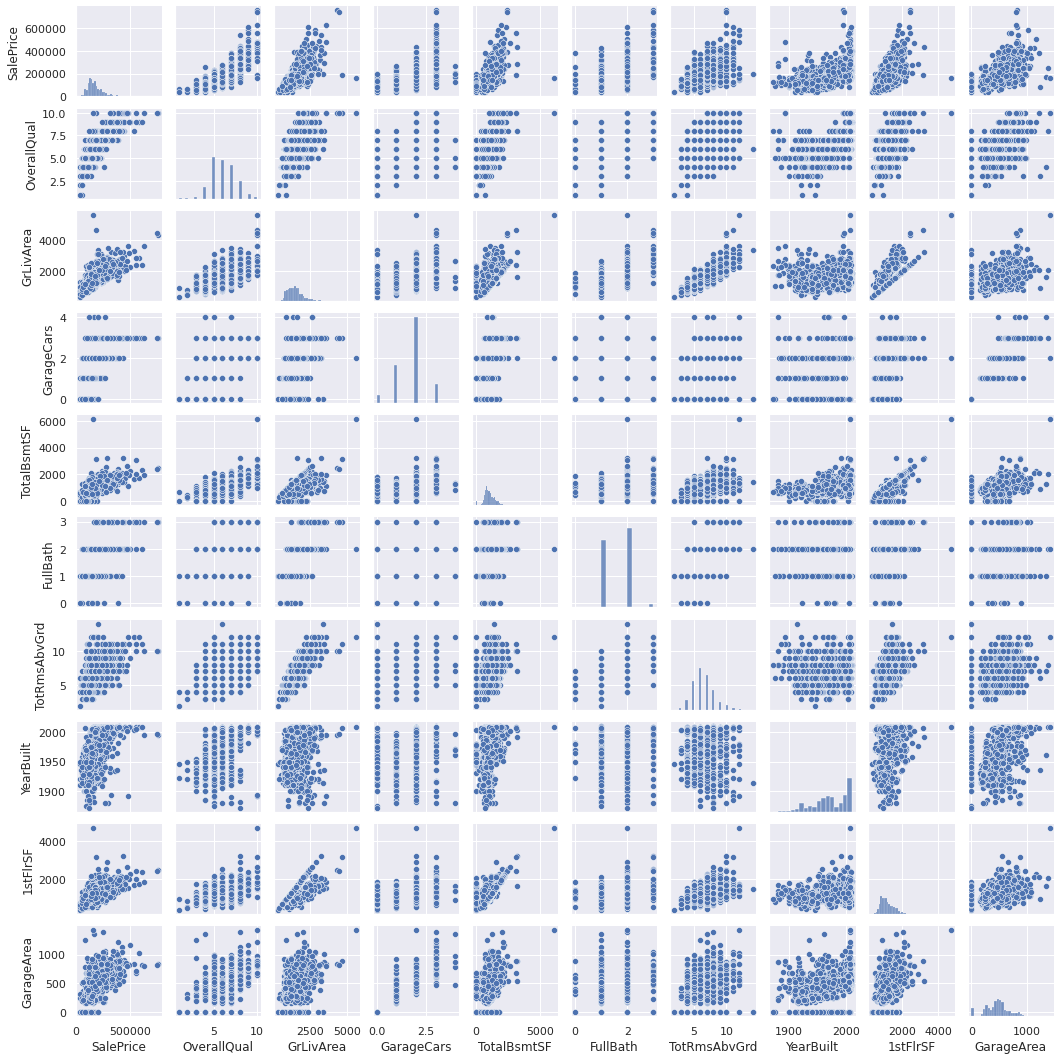

In [52]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', '1stFlrSF','GarageArea'] 
sns.pairplot(train[cols], size=1.5)
plt.show();

### Missing data

In [53]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [54]:
def  preprocess_data(df):
      df.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","LotFrontage","GarageYrBlt","GarageCond","GarageType","GarageFinish","GarageQual"],axis=1,inplace=True) 
      df.drop(["GarageArea","1stFlrSF","TotRmsAbvGrd","FullBath"],axis=1,inplace=True) #from heatmap above 
#"BsmtFinType2","BsmtExposure", "BsmtQual","BsmtCond","BsmtFinType1","MasVnrArea","MasVnrType"
      for label, content in df.items():
          if pd.api.types.is_numeric_dtype(content):
              if pd.isnull(content).sum():
                  df[label+"_is_missing"] = pd.isnull(content)
                  df[label] = content.fillna(content.median())

          if not pd.api.types.is_numeric_dtype(content):
              df[label+"_is_missing"] = pd.isnull(content)
              df[label] = pd.Categorical(content).codes+1
      return df

In [55]:
preprocess_data(train_tmp)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,BsmtFinType2_is_missing,Heating_is_missing,HeatingQC_is_missing,CentralAir_is_missing,Electrical_is_missing,KitchenQual_is_missing,Functional_is_missing,PavedDrive_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1,60,4,8450,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
1,2,20,4,9600,2,4,4,1,3,1,...,False,False,False,False,False,False,False,False,False,False
2,3,60,4,11250,2,1,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
3,4,70,4,9550,2,1,4,1,1,1,...,False,False,False,False,False,False,False,False,False,False
4,5,60,4,14260,2,1,4,1,3,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,4,7917,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
1456,1457,20,4,13175,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
1457,1458,70,4,9042,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
1458,1459,20,4,9717,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False


In [56]:
preprocess_data(test_tmp)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,CentralAir_is_missing,Electrical_is_missing,BsmtFullBath_is_missing,BsmtHalfBath_is_missing,KitchenQual_is_missing,Functional_is_missing,GarageCars_is_missing,PavedDrive_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1461,20,3,11622,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
1,1462,20,4,14267,2,1,4,1,1,1,...,False,False,False,False,False,False,False,False,False,False
2,1463,60,4,13830,2,1,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
3,1464,60,4,9978,2,1,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
4,1465,120,4,5005,2,1,2,1,5,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,5,1936,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
1455,2916,160,5,1894,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
1456,2917,20,4,20000,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
1457,2918,85,4,10441,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False


In [80]:
# Check if columns contain strings
for label, content in train_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [57]:
train_tmp.isnull().sum().max()

0

In [58]:
test_tmp.isnull().sum().max()

0

### Outlier

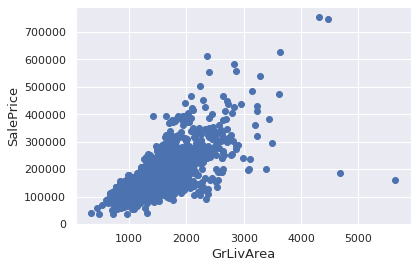

In [59]:
fig, ax = plt.subplots()
ax.scatter(x=train['GrLivArea'], y= train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [60]:
# Deleting outliers
train_tmp = train_tmp.drop(train_tmp[(train_tmp['GrLivArea']>4000) & (train_tmp['SalePrice']<300000)].index)

### Target

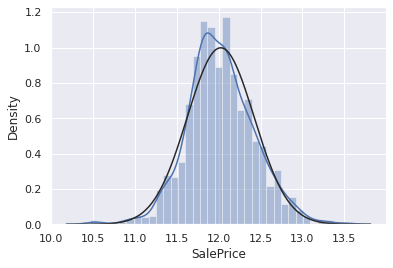

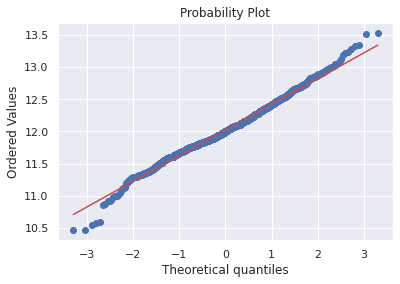

In [83]:
sns.distplot(train_tmp['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_tmp['SalePrice'], plot=plt)

In [61]:
train_tmp["SalePrice"] = np.log1p(train_tmp["SalePrice"])

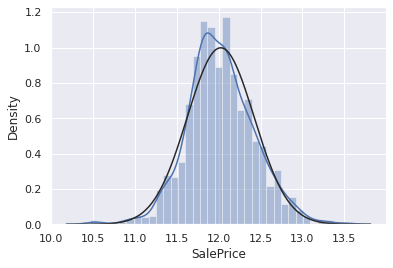

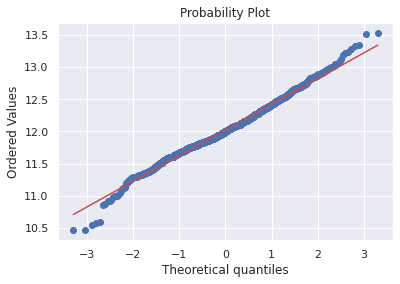

In [84]:
#Check
sns.distplot(train_tmp['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_tmp['SalePrice'], plot=plt)

## 5. Modelling
Following the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), we find a [RandomForestRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=randomforestregressor#sklearn.ensemble.RandomForestRegressor). might be a good candidate.

In [8]:
train_tmp.shape, test_tmp.shape

((1458, 101), (1459, 107))

In [9]:
# Find how the columns differ using sets
set(test_tmp.columns) - set(train_tmp.columns) 

{'BsmtFinSF1_is_missing',
 'BsmtFinSF2_is_missing',
 'BsmtFullBath_is_missing',
 'BsmtHalfBath_is_missing',
 'BsmtUnfSF_is_missing',
 'GarageCars_is_missing',
 'TotalBsmtSF_is_missing'}

In [63]:
train_tmp["BsmtFinSF1_is_missing"]= False
train_tmp["BsmtFinSF2_is_missing"]= False
train_tmp["BsmtFullBath_is_missing"] = False
train_tmp["BsmtHalfBath_is_missing"] = False
train_tmp["BsmtUnfSF_is_missing"]= False
train_tmp["GarageCars_is_missing"] = False
train_tmp["TotalBsmtSF_is_missing"] = False
train_tmp.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive_is_missing,SaleType_is_missing,SaleCondition_is_missing,BsmtFinSF1_is_missing,BsmtFinSF2_is_missing,BsmtFullBath_is_missing,BsmtHalfBath_is_missing,BsmtUnfSF_is_missing,GarageCars_is_missing,TotalBsmtSF_is_missing
0,1,60,4,8450,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
1,2,20,4,9600,2,4,4,1,3,1,...,False,False,False,False,False,False,False,False,False,False
2,3,60,4,11250,2,1,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
3,4,70,4,9550,2,1,4,1,1,1,...,False,False,False,False,False,False,False,False,False,False
4,5,60,4,14260,2,1,4,1,3,1,...,False,False,False,False,False,False,False,False,False,False


In [81]:
#check
train_tmp.shape, test_tmp.shape

((1458, 108), (1459, 107))

In [64]:
# Split data into X & y
X = train_tmp.drop(["SalePrice"], axis=1)
y = train_tmp.SalePrice

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [66]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 500, 10),
               "max_depth": [None, 3, 5, 10],
                "min_samples_split": np.arange(2, 20, 2),
                "min_samples_leaf": np.arange(1, 20, 2),
                "max_features": [0.5, 1, "sqrt", "auto"],
                "max_samples": [1000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                                                 param_distributions=rf_grid,
                                                 n_iter=100,
                                                 cv=5,
                                                 verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 8.19 s, sys: 87.8 ms, total: 8.28 s
Wall time: 9.86 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490])},
                   verbose=True)

In [67]:
rs_model.best_params_

{'n_estimators': 460,
 'min_samples_split': 10,
 'min_samples_leaf': 7,
 'max_samples': 1000,
 'max_features': 'auto',
 'max_depth': 3}

In [68]:
ideal_model = RandomForestRegressor(n_estimators=460,
                                                         min_samples_leaf=7,
                                                         min_samples_split=10,
                                                         max_features='auto',
                                                         max_depth=3,
                                                         n_jobs=-1,
                                                         max_samples=None)
ideal_model.fit(X_train,y_train)
test_preds = ideal_model.predict(test_tmp)
ideal_model.score(X_train,y_train)

0.7919971807343933

In [69]:
model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, y_train)
preds = np.expm1(model.predict(test_tmp))
model.score(X_train,y_train)

0.9835513676892262

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
def show_scores(model):
    train_preds = model.predict(X_train)
    scores = {"MAE": mean_absolute_error(y_train, train_preds),
                   "RMSE": sqrt(mean_squared_error(y_train, train_preds)),
                   "R^2": model.score(X_train, y_train),}
    return scores

In [74]:
show_scores(model)

{'MAE': 0.03487669973236402,
 'RMSE': 0.050886552904872526,
 'R^2': 0.9835513676892262}

In [76]:
show_scores(ideal_model)

{'MAE': 0.1324356409050159,
 'RMSE': 0.18095589964661496,
 'R^2': 0.7919971807343937}

## Submission

In [86]:
df_pred = pd.DataFrame()
df_pred["Id"] = test_tmp["Id"]
df_pred["SalePrice"] = preds
df_pred

,Id,SalePrice
0,1461,123022.634531
1,1462,149879.453091
2,1463,172417.129234
3,1464,181727.173624
4,1465,199902.450295
...,...,...
1454,2915,88491.686625
1455,2916,87937.559860
1456,2917,155185.647859
1457,2918,113310.941424


In [87]:
df_pred.to_csv('/content/drive/MyDrive/Project/house price/data/submission.csv',index=False)